## Load packages

In [2]:
# c/o @count0
%%capture
!echo "deb http://downloads.skewed.de/apt jammy main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

In [3]:
# c/o @count0
%%capture
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard

In [4]:
import graph_tool.all as gt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import networkx as nx #

## Load data

In [5]:
# import data
g = gt.collection.ns["eu_procurements"]

## Explore data

In [6]:
print(g)

<Graph object, undirected, with 839824 vertices and 4098711 edges, 10 internal vertex properties, 15 internal edge properties, 5 internal graph properties, at 0x7870fad5fa00>


In [7]:
g.list_properties()

name                   (graph)   (type: string, val: eu_procurements)
description            (graph)   (type: string, val: A bipartite network of
                                                     public EU procurement
                                                     contracts, from 2008 to
                                                     2016, between issuing
                                                     buyers (public
                                                     institutions such as a
                                                     ministry or city hall) and
                                                     supplying winners (a
                                                     private firm). Contracts
                                                     are aggregated into annual
                                                     snapshots, edges are
                                                     annotated with contract
                    

In [8]:
# our network is undirected
g.is_directed()

False

## In and out degree distribution

In [12]:
# TODO: Adapt to undirected network --------------------------------------------
in_hist = gt.vertex_hist(g, "in")

out_hist = gt.vertex_hist(g, "out")

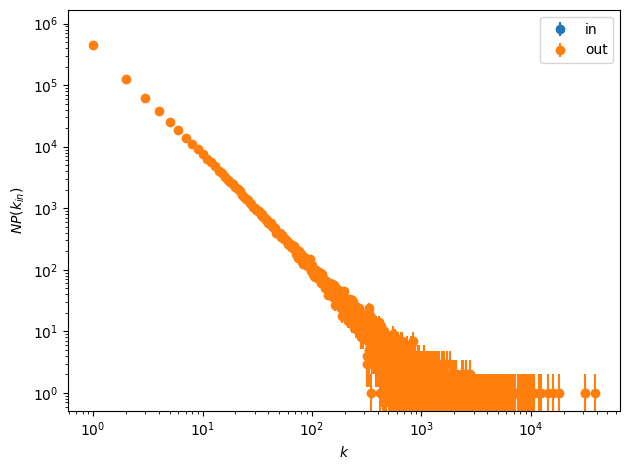

In [13]:
# TODO: Adapt to undirected network --------------------------------------------

# Extract the data for "in" links and calculate error bars based on the square root of the data.
y = in_hist[0]
err = np.sqrt(in_hist[0])

# Create an errorbar plot for "in" links.
plt.errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="in")

# Extract the data for "out" links and calculate error bars based on the square root of the data.
y = out_hist[0]
err = np.sqrt(out_hist[0])

# Create an errorbar plot for "out" links. However, this is likely not relevant for an undirected network.
plt.errorbar(out_hist[1][:-1], out_hist[0], fmt="o", yerr=err,
        label="out")

# Set the y-axis and x-axis scales to logarithmic.
plt.yscale("log")
plt.xscale("log")

# Label the x-axis and y-axis.
plt.xlabel("$k$")
plt.ylabel("$NP(k_{in})$")

# Adjust the plot layout for better visualization.
plt.tight_layout()

 # Add legend to the plot
plt.legend()

## Select a subgraph for visualization

In [9]:
# Create a graph view 'gv' of the original graph 'g' with directed edges treated as undirected.
gv = gt.GraphView(g, directed=False)

In [ ]:
# Retrieve the vertices (nodes) of the graph 'g'.
vertices = g.get_vertices()

In [30]:
# Access the vertex property 'country' associated with the vertices of the graph 'g'.
country_property = g.vp.country

<VertexPropertyMap object with value type 'string', for Graph 0x7870fad5fa00, at 0x7870fad89b70>

In [ ]:
# TODO: create a filtered (aka "masked") subset of the data --------------------

mask = gv.new_edge_property("bool", vals = eb.fa < 1e-5)
gv.set_edge_filter(mask)

In [34]:
# Extract the largest connected component from the graph 'g', considering it as an undirected graph.
# This step ensures that the resulting subgraph is the largest connected portion of the original graph
u = gt.extract_largest_component(g, directed=False)

print(u)

# Create a new graph 'u' by applying pruning. Pruning typically removes isolated vertices and edges
# that do not belong to the largest connected component.
u = gt.Graph(u, prune=True)

print(u)

<GraphView object, undirected, with 812629 vertices and 4079059 edges, 10 internal vertex properties, 15 internal edge properties, 5 internal graph properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7870709efdf0, at 0x78707084fb50>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7870709efdf0, at 0x78707084dff0>, False), at 0x7870709efdf0>
<Graph object, undirected, with 812629 vertices and 4079059 edges, 10 internal vertex properties, 15 internal edge properties, 5 internal graph properties, at 0x78707084d720>


## Spring layout

In [ ]:
# TODO: Code won't run ---------------------------------------------------------

# Use the 'sfdp_layout' function to calculate the layout positions of vertices in the graph 'u'.
# 'sfdp_layout' is a force-directed layout algorithm that helps determine the spatial arrangement
# of nodes (vertices) in the graph, based on their relationships and connections.
pos = gt.sfdp_layout(u)

In [ ]:
# Use 'graph_draw' to render the graph 'u' using the calculated layout 'pos'.
# This function visualizes the graph by rendering its nodes and edges according to the specified layout.
gt.graph_draw(u, pos)

In [ ]:
# Calculate the layout positions of the graph 'u' using the Fruchterman-Reingold force-directed layout algorithm.
# This layout algorithm determines the spatial arrangement of nodes in the graph based on attractive and repulsive forces.
# 'n_iter' is set to 100 to control the number of iterations for layout convergence.
pos_fr = gt.fruchterman_reingold_layout(u, n_iter=100)

In [ ]:
gt.graph_draw(u, pos_fr)

In [ ]:
# Render the graph 'u' using the 'graph_draw' function while specifying the layout positions.
# The layout positions are retrieved from the vertex property '_pos'.
gt.graph_draw(u, pos=u.vp["_pos"])

## Map

In [ ]:
# Load a dataset of natural earth countries using 'geopandas.datasets.get_path'.
# This dataset contains geometrical and attribute information about countries.
import geopandas as gpd

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

## Radial tree

In [ ]:
# Calculate the radial tree layout for the graph 'u' starting from vertex 0.
# A radial tree layout is a layout algorithm that arranges the vertices in a tree-like structure
# with a central vertex (in this case, vertex 0) at the center and its connected vertices branching outward.
pos_tree = gt.radial_tree_layout(u, 0)

In [ ]:
gt.graph_draw(u, pos_tree)

In [ ]:
# TODO: Adapt to undirected graph ----------------------------------------------

# Calculate the maximum in-degree (number of incoming edges) in the graph 'u'
maximum = max(u.get_in_degrees(u.get_vertices()))

# Print the indices of vertices with the maximum in-degree.
# This will identify the vertices with the highest number of incoming edges.
print(np.where(u.get_in_degrees(u.get_vertices()) == maximum))

# Print the in-degrees of all vertices in the graph.
print(u.get_in_degrees(u.get_vertices()))

In [ ]:
# Calculate the radial tree layout for the graph 'u' starting from vertex 1.
# A radial tree layout is a layout algorithm that arranges the vertices in a tree-like structure
# with a central vertex (in this case, vertex 1) at the center and its connected vertices branching outward.
pos_tree = gt.radial_tree_layout(u, 1)

In [ ]:
gt.graph_draw(u, pos_tree)

In [ ]:
# Perform hierarchical block modeling on the graph 'u' to identify nested communities.
state = gt.minimize_nested_blockmodel_dl(u)

# Get the hierarchy tree (rooted tree) from the state.
t = gt.get_hierarchy_tree(state)[0]

# Calculate the layout positions of the hierarchy tree 't' using a radial tree layout.
# The layout starts from the vertex at the bottom (last vertex), and it's weighted.
tpos = pos = gt.radial_tree_layout(t, t.vertex(t.num_vertices() - 1, use_index=False), weighted=True)

# Calculate the control points for edges in the hierarchy tree.
cts = gt.get_hierarchy_control_points(u, t, tpos)

# Assign the layout positions of 't' to the 'u' graph's vertices.
pos = u.own_property(tpos)

# Retrieve the block structure from the top level of the hierarchy.
b = state.levels[0].b

# Create a copy of the block structure for vertex shape assignments.
shape = b.copy()

# Adjust the vertex shapes by taking modulo 14 (cycling through shape options).
shape.a %= 14

# Use 'graph_draw' to visualize the 'u' graph with specified parameters.
gt.graph_draw(u, pos=pos, vertex_fill_color=b, vertex_shape=shape, edge_control_points=cts,
              edge_color=[0, 0, 0, 0.3], vertex_anchor=0)

## Shortest paths

[1 0 7 ... 8 8 8]


(array([2.00000e+00, 9.00000e+00, 1.42000e+03, 1.04600e+03, 1.18815e+05,
        5.59873e+05, 1.26147e+05, 2.43500e+03, 2.77300e+03, 1.09000e+02]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

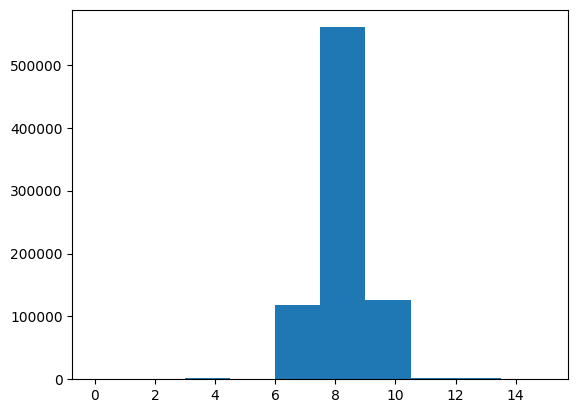

In [11]:
# Calculate the shortest distance from a specific source vertex (vertex 1) to all other vertices in the graph 'u'.
dist = gt.shortest_distance(u, source=u.vertex(1))

# Print the resulting array containing the shortest distances from vertex 1 to all other vertices.
print(dist.a)

# Create a histogram of the shortest distances for visualization.
plt.hist(dist.a)

In [ ]:
# TODO: Code won't run ---------------------------------------------------------

# hist, bin_edges = gt.distance_histogram(u)
# print(hist)
# plt.bar(bin_edges[:-1], hist, width=1)

In [ ]:
# dist = gt.shortest_distance(u)

# average_path_length = gt.vertex_average(u, dist)
# print(np.mean(average_path_length))

## Percolation

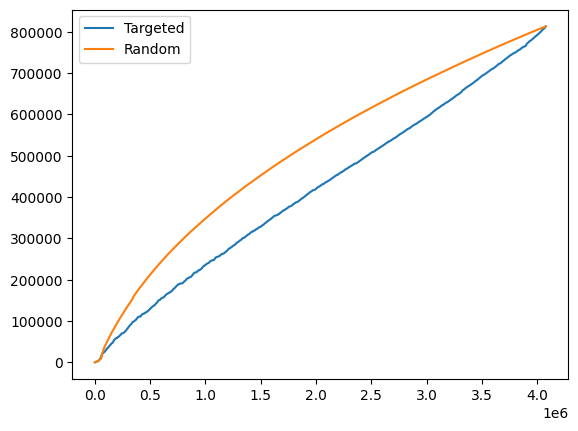

In [11]:
# TODO: Adapt to undirected network --------------------------------------------

# Generate a list of edges in the graph 'u', sorted by the product of their source and target vertices' in-degrees.
edges = sorted([(e.source(), e.target()) for e in u.edges()],
               key=lambda e: e[0].in_degree() * e[1].in_degree())

# Perform edge percolation on the graph 'u' using the sorted edges to target high in-degree vertices first.
sizes, comp = gt.edge_percolation(u, edges)

# Shuffle the order of edges randomly to perform edge percolation with a random order.
np.random.shuffle(edges)

# Perform edge percolation on the graph 'u' using the shuffled edges.
sizes2, comp = gt.edge_percolation(u, edges)

# Plot the sizes of the connected components for both targeted and random edge percolation.
plt.plot(sizes, label="Targeted")
plt.plot(sizes2, label="Random")

# Add a legend to distinguish the two percolation methods in the plot.
plt.legend()

## k-core decomposition

In [ ]:
# TODO: Code won't run ---------------------------------------------------------

# The following code attempts to perform k-core decomposition on the graph 'u'.
# K-core decomposition is a graph analysis technique that identifies and assigns coreness values
# to nodes in the graph, indicating their level of connectedness within the graph.
# kcore = gt.kcore_decomposition(u)

# The resulting coreness values are then used to color the vertices and display them with the coreness values as text.
# gt.graph_draw(u, vertex_fill_color=kcore, vertex_text=kcore)

In [ ]:
# gt.pseudo_diameter(u)

## Centrality measures

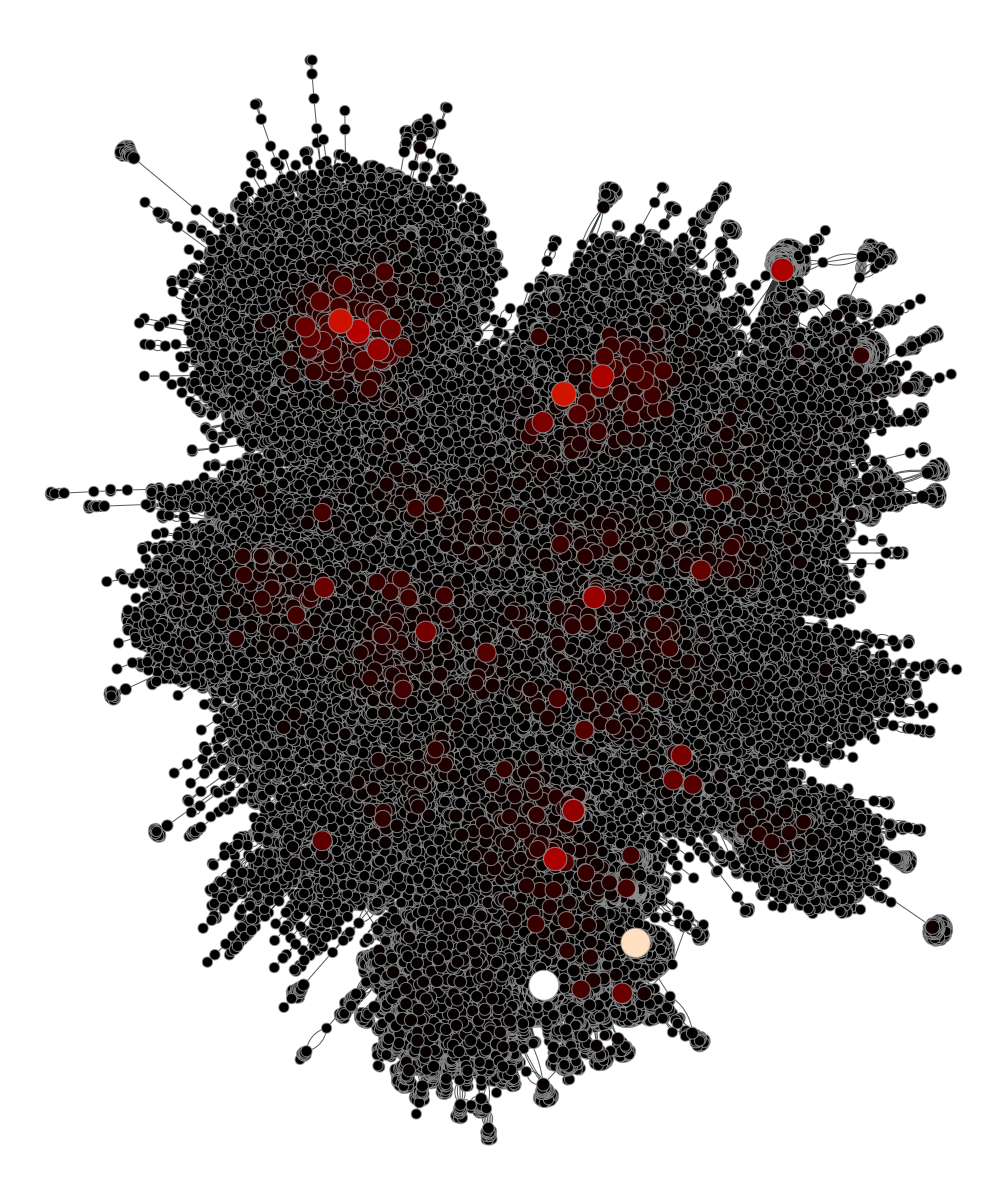

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x78707084d720, at 0x7870f8766470>

In [35]:
# Calculate the PageRank scores for the vertices in the graph 'u'.
pr = gt.pagerank(u)

# Visualize the graph 'u' with specific settings based on PageRank scores.
gt.graph_draw(u, pos=u.vp["_pos"],

              vertex_fill_color=pr,  # Color the vertices based on their PageRank scores.

              vertex_size=gt.prop_to_size(pr, mi=5, ma=15),  # Adjust vertex size based on PageRank.

              vorder=pr,  # Set the vertex order based on PageRank scores.

              vcmap=matplotlib.cm.gist_heat)  # Use a colormap for vertex colors.


In [ ]:
# TODO: Code won't run ---------------------------------------------------------

# Calculate the betweenness centrality for vertices (vp) and edges (ep) in the graph 'u'.
vp, ep = gt.betweenness(u)

# Visualize the graph 'u' with specific settings based on betweenness centrality.
gt.graph_draw(u, pos=u.vp["_pos"],

              vertex_fill_color=vp,  # Color vertices based on their betweenness centrality.

              vertex_size=gt.prop_to_size(vp, mi=5, ma=15),  # Adjust vertex size based on betweenness centrality.

              edge_pen_width=gt.prop_to_size(ep, mi=0.5, ma=5),  # Adjust edge pen width based on edge betweenness.

              vcmap=matplotlib.cm.gist_heat,  # Use a colormap for vertex colors.

              vorder=vp)  # Set the vertex order based on betweenness centrality.

In [ ]:
# Calculate the closeness centrality (c) for vertices in the graph 'u'.
c = gt.closeness(u)

# Visualize the graph 'u' with specific settings based on closeness centrality.
gt.graph_draw(u, pos=u.vp["_pos"],

              vertex_fill_color=c,  # Color vertices based on their closeness centrality.

              vertex_size=gt.prop_to_size(c, mi=0.5, ma=5),  # Adjust vertex size based on closeness centrality.

              vcmap=matplotlib.cm.gist_heat,  # Use a colormap for vertex colors.

              vorder=c)  # Set the vertex order based on closeness centrality.

In [ ]:
# Calculate the eigenvector centrality (x) for vertices in the graph 'u' using edge weights (u.ep["weight"]).
ee, x = gt.eigenvector(u, u.ep["weight"])

# Visualize the graph 'u' with specific settings based on eigenvector centrality.
gt.graph_draw(u, pos=u.vp["_pos"],

              vertex_fill_color=x,  # Color vertices based on their eigenvector centrality.

              vertex_size=gt.prop_to_size(x, mi=5, ma=15),  # Adjust vertex size based on eigenvector centrality.

              vcmap=matplotlib.cm.gist_heat,  # Use a colormap for vertex colors.

              vorder=x)  # Set the vertex order based on eigenvector centrality.

In [ ]:
# Visualize the graph 'u' with specific settings based on the provided layout positions (pos_fr).

gt.graph_draw(u, pos=pos_fr,

              vertex_fill_color=x,  # Color vertices based on a centrality measure (e.g., eigenvector centrality).

              vertex_size=gt.prop_to_size(x, mi=5, ma=15),  # Adjust vertex size based on the centrality measure.

              vcmap=matplotlib.cm.gist_heat,  # Use a colormap for vertex colors.

              vorder=x)  # Set the vertex order based on the centrality measure.

In [ ]:
# Calculate the local clustering coefficients for vertices in the graph 'u'.
clust = gt.local_clustering(u)

# Print the vertex average of the local clustering coefficients.
# This provides the average clustering coefficient across all vertices in the graph.
print(gt.vertex_average(u, clust))

In [ ]:
print(clust.a)

In [ ]:
# TODO: Adapt to undirected network --------------------------------------------

# Calculate the out-degrees of all vertices in the graph 'u' and store the results in the 'out_degs' variable.
out_degs = u.get_out_degrees(u.get_vertices())

In [ ]:
# TODO: Adapt to undirected network --------------------------------------------

# Create a scatter plot to visualize the relationship between out-degrees and local clustering coefficients.
# The 'out_degs' variable contains the out-degrees for each vertex, and 'clust.a' contains the local clustering coefficients.
# The 'alpha=0.5' parameter controls the transparency of the plotted points.
plt.scatter(out_degs, clust.a, alpha=0.5)

In [ ]:
# TODO: Adapt to undirected network --------------------------------------------

# Calculate the in-degrees of all vertices in the graph 'u' and store the results in the 'in_degs' variable.
in_degs = u.get_in_degrees(u.get_vertices())

In [ ]:
# TODO: Adapt to undirected network --------------------------------------------

# Create a scatter plot to visualize the relationship between in-degrees and local clustering coefficients.
# The 'in_degs' variable contains the in-degrees for each vertex, and 'clust.a' contains the local clustering coefficients.
# The 'alpha=0.5' parameter controls the transparency of the plotted points.
plt.scatter(in_degs, clust.a, alpha=0.5)

## Blockmodel

In [33]:
# Perform a blockmodel decomposition on the graph 'u' to identify community structure.
state = gt.minimize_blockmodel_dl(u)

# Visualize the blockmodel using layout positions from the 'u' graph and vertex shapes based on the block assignments.
state.draw(pos=u.vp["_pos"], vertex_shape=state.get_blocks())

NameError: ignored

In [ ]:
# Visualize the blockmodel using custom layout positions ('pos_fr') and vertex shapes based on the block assignments.
state.draw(pos=pos_fr, vertex_shape=state.get_blocks())

In [ ]:
# Visualize the blockmodel using custom layout positions ('pos_fr'), vertex shapes based on block assignments,
# and vertex sizes determined by a property 'x'.
state.draw(pos=pos_fr, vertex_shape=state.get_blocks(), vertex_size=gt.prop_to_size(x, mi=5, ma=25))

In [ ]:
# Perform a nested blockmodel decomposition on the graph 'u' to identify hierarchical community structure.
state2 = gt.minimize_nested_blockmodel_dl(u)

# Visualize the nested blockmodel structure.
state2.draw()

In [ ]:
# Print the block assignments for each vertex in the blockmodel created using the 'state' object.
print(state.get_blocks().a)

In [ ]:
# Print the values of the "name" vertex property for all vertices in the graph 'u'.
print(u.vp["name"].a)

In [ ]:
u.save("eu_procurements_2.graphml")

In [ ]:
# TODO: replicate plots from original paper ------------------------------------